In [1]:
import os
from os import listdir
from shutil import copyfile
from os.path import isfile, join
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import numpy as np

In [2]:
folder="Acc_wo"
#changing folder's name to the one which has .csv files

mypath="C:\\Users\\nilu1\\Desktop\\Code\\AndroidPattern\\New\\Split\\"+folder+"\\"
mypathg="C:\\Users\\nilu1\\Desktop\\Code\\AndroidPattern\\New\\Split\\Gyro\\"
mypatha="C:\\Users\\nilu1\\Desktop\\Code\\AndroidPattern\\New\\Split\\Acc_w\\"

newpath="C:\\Users\\nilu1\\Desktop\\Code\\AndroidPattern\\New\\Spike\\"+folder+"\\"
newpathg="C:\\Users\\nilu1\\Desktop\\Code\\AndroidPattern\\New\\Spike\\Gyro\\"
newpatha="C:\\Users\\nilu1\\Desktop\\Code\\AndroidPattern\\New\\Spike\\Acc_w\\"
# onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles=[]
temp = [f for f in listdir(mypath) if isfile(join(mypath, f))]
temp.sort()
# print(temp)
# onlyfiles=temp[:4]
onlyfiles=temp[-4:]
print(len(onlyfiles))

4


4b0c04-05-2020_094444_PM1.csv 1588608878462.0
4b0c04-05-2020_094444_PM1_1588608878462.csv


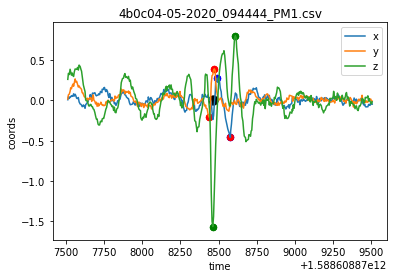

4b0c04-05-2020_094444_PM2.csv 1588608880330.0
4b0c04-05-2020_094444_PM2_1588608880330.csv


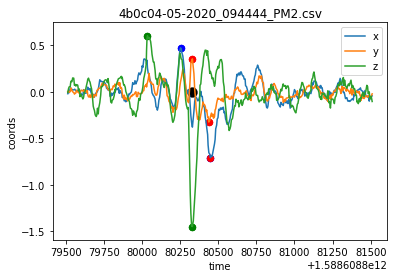

4b0c04-05-2020_094444_PM3.csv 1588608882309.0
4b0c04-05-2020_094444_PM3_1588608882309.csv


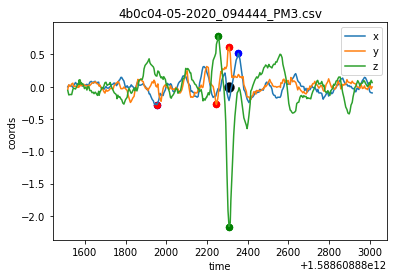

4b0c04-05-2020_094444_PM4.csv 1588608883904.0
4b0c04-05-2020_094444_PM4_1588608883904.csv


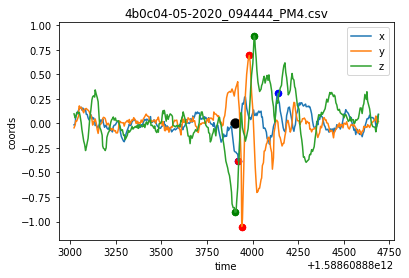

In [3]:
count=0
countt=0
for i in onlyfiles:
    time=[]
    x=[]
    y=[]
    z=[]
    file=open(mypath+i)
    _=file.readline()
    lines=file.readlines()
#     print(i)
    for j in lines:
        j=j.strip("\n")
        time.append(float(j.split(",")[0].strip("\"")))
        x.append(float(j.split(",")[1].strip("\"")))
        y.append(float(j.split(",")[2].strip("\"")))
        z.append(float(j.split(",")[3].strip("\"")))

    plt.plot(time, x,label="x")
    plt.plot(time, y,label="y")
    plt.plot(time, z,label="z")

    xn = np.asarray(x)
    yn = np.asarray(y)
    zn = np.asarray(z)
    tn = np.asarray(time)

    x_max_index = argrelextrema(xn, np.greater, order=500)
    y_max_index = argrelextrema(yn, np.greater, order=500)
    z_max_index = argrelextrema(zn, np.greater, order=500)

    x_min_index = argrelextrema(xn, np.less, order=500)
    y_min_index = argrelextrema(yn, np.less, order=500)
    z_min_index = argrelextrema(zn, np.less, order=500)

    # print(min(x))
    # print(max(x))
    xyz=[]
    
    temp=[]
    avg=[]

    x1=list(x_max_index[0])
    x2=list(x_min_index[0])
    # print(x_max_index[0])
    # xmid=time[x1[int(len(x1)/2)]]
    x1.append(x.index(max(x)))
    x1.append(x.index(min(x)))
    temp.append(x.index(max(x)))
    temp.append(x.index(min(x)))
    x1.extend(x2)
    xyz.extend(x1)
    x1.sort()
    x_max_index=np.asarray(x1)

    y1=list(y_max_index[0])
    y2=list(y_min_index[0])
    y1.append(y.index(max(y)))
    y1.append(y.index(min(y)))
    temp.append(y.index(max(y)))
    temp.append(y.index(min(y)))
    y1.extend(y2)
    xyz.extend(y1)
    y1.sort()
    y_max_index=np.asarray(y1)
#     print(y_max_index)

    z1=list(z_max_index[0])
    z2=list(z_min_index[0])
    z1.append(z.index(max(z)))
    z1.append(z.index(min(z)))
    temp.append(z.index(max(z)))
    temp.append(z.index(min(z)))
    z1.extend(z2)
    xyz.extend(z1)
    z1.sort()
    z_max_index=np.asarray(z1)

    xyz.sort()
#     xmid=time[xyz[int(len(xyz)/2)]]

    xmid=time[temp[5]]
    
    print(i,xmid)

    newname=i[:-4]+"_"+str(int(xmid))+".csv"
    
    print(newname)
    copyfile(mypath+i, newpath+newname)
    copyfile(mypathg+i,newpathg+newname)
    copyfile(mypatha+i,newpatha+newname)
    plt.scatter(xmid,0,linewidth=0.3, s=100, c='black', alpha=1)
#     plt.scatter(keydt,0,linewidth=0.3, s=100, c='gray', alpha=1)
    plt.scatter(tn[x_max_index],xn[x_max_index],linewidth=0.3, s=50, c='blue')
    plt.scatter(tn[y_max_index],yn[y_max_index],linewidth=0.3, s=50, c='red')
    plt.scatter(tn[z_max_index],zn[z_max_index],linewidth=0.3, s=50, c='green')
    plt.scatter(tn[x_min_index[0]],xn[x_min_index[0]],linewidth=0.3, s=50, c='r')
    plt.xlabel("time")
    plt.ylabel("coords") 
    plt.title(i) 
    plt.legend()
    plt.show()